# 素数を求めて（ディープラーニング編）

素数——勇気を与えてくれる数——を求めて、ディープラーニングでやってみます。

一応、過学習には「成功」しました。

## 素数とは

[Wikipedia](https://ja.wikipedia.org/wiki/%E7%B4%A0%E6%95%B0)によると、**素数**（そすう、英: prime number）とは、1より大きい自然数で、正の約数が1と自分自身のみであるものを指します。正の約数の個数が2である自然数と言い換えることもできます。1より大きい自然数で素数でないものは**合成数**と呼ばれます。

[某アニメのキャラクター](https://ja.wikipedia.org/wiki/%E3%82%A8%E3%83%B3%E3%83%AA%E3%82%B3%E3%83%BB%E3%83%97%E3%83%83%E3%83%81)の言葉を借りれば、1と自分の数でしか割ることのできない**孤独な数字**です。

## 素数の割合

10以下の素数は4個、100以下の素数は25個あります。[Wikipedia](https://ja.wikipedia.org/wiki/%E7%B4%A0%E6%95%B0%E5%AE%9A%E7%90%86)に10の25乘までの素数の個数が載っているので、自然数の中に含まれる素数の割合を可視化することができます。

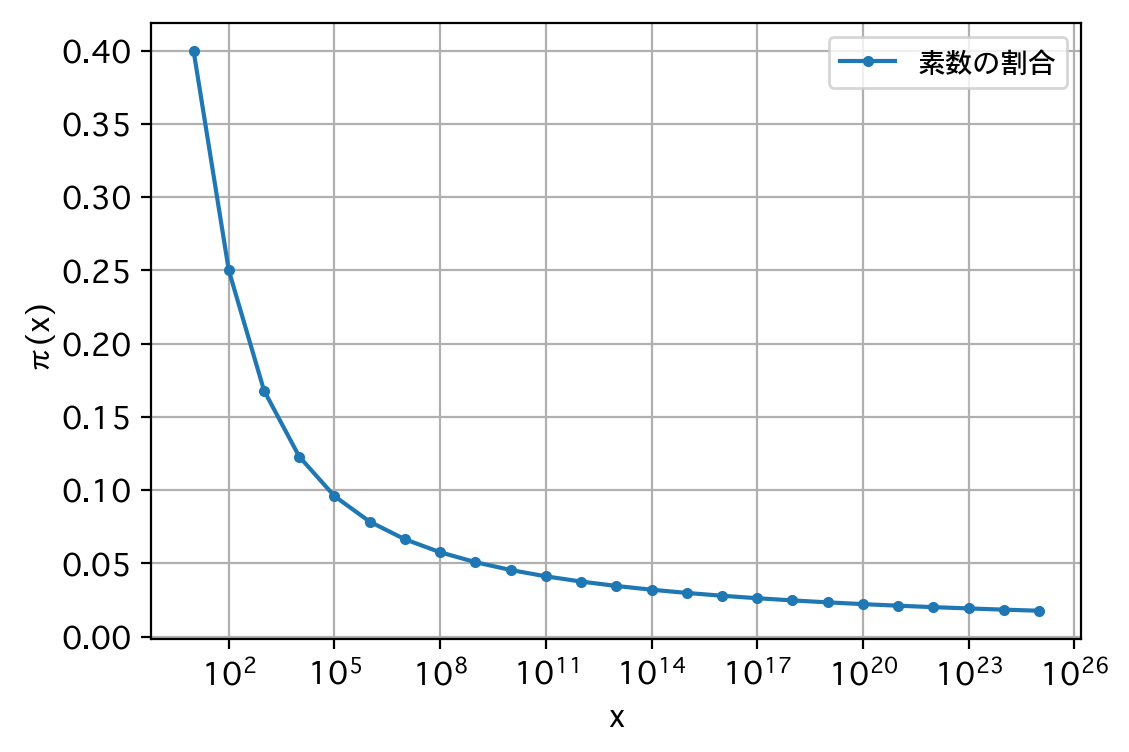

10の25乗以下の素数の割合：0.017684630939914375


In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([10**i for i in range(1, 26)])
y = [4, 25, 168, 1229, 9592, 78498, 664579, 5761455, 50847534
     , 455052511, 4118054813, 37607912018, 346065536839, 3204941750802
     , 29844570422669, 279238341033925, 2623557157654233, 24739954287740860
     , 234057667276344607, 2220819602560918840, 21127269486018731928
     , 201467286689315906290, 1925320391606803968923
     , 18435599767349200867866, 176846309399143769411680]
y = y / x

plt.figure()
plt.plot(x, y, marker='.', label='素数の割合')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('x')
plt.ylabel('π(x)')
plt.xscale('log')
plt.show()

print('10の25乗以下の素数の割合：' + str(176846309399143769411680/10**25))

10以下の素数の割合は40%、100以下の素数の割合は25%です。結構な割合で素数が含まれているように思いますが、捜索範囲を広げていくと、その割合は低くなっていきます。10の25乘までいくと、わずか1.77%となります。

[某神父](https://ja.wikipedia.org/wiki/%E3%82%A8%E3%83%B3%E3%83%AA%E3%82%B3%E3%83%BB%E3%83%97%E3%83%83%E3%83%81)は、1と自分の数でしか割ることのできない点において、素数を孤独な数字と呼びましたが、母数に対する割合が低いという点においても、素数は孤独な数字です。

素数の間隔が広い場所、すなわち合成数が連続する場所を**素数砂漠**と言うことにすると、いくらでも長い素数砂漠が存在します（[素数の間隔に最大値がないことの３通りの証明](https://mathtrain.jp/primedesert)）。宇宙に散らばる星に負けないくらい、素数は**孤独な存在**なのです。

## 素数判定

[素数判定](https://ja.wikipedia.org/wiki/%E7%B4%A0%E6%95%B0%E5%88%A4%E5%AE%9A)、すなわち、ある自然数nが素数であるか合成数であるかを判定する問題は、人類（数学者）を惹きつけてきた問題の一つであり、様々なアルゴリズムが考えられてきました。

一般的な数に対する判定法は、「素数である」あるいは否と判定する**決定的素数判定法**と、「合成数である」または「良く分からない」と判別する**確率的素数判定法**とに区分されます。

しかし、そのいずれも、演繹的アプローチであり、[私の関心](https://qiita.com/tanuk1647/items/cdf2f18335008a428bf8#%E7%A7%81%E3%81%AE%E7%90%86%E8%A7%A3)は、帰納的アプローチにあります。すなわち、機械学習やディープラーニングの手法で、素数を判定することはできるのでしょうか。

[芝浦工業大学 数理科学研究会（2017）](http://sitmathclub.web.fc2.com/seisaku/oomiyasai2017/sirixyou/siryou_ishikawa.pdf)は、ディープラーニングの手法で素数判定を試みています。その結果は、以下の2点です。

- 訓練を重ねても、有効な学習結果が得られなかった
- できたモデルは、全ての入力に対して「素数ではない」と判定した

実際、私も挑戦してみましたが、同じ結果が得られました。学習は頭打ち。100以下の整数に対する正答率が75%を示したときは、一瞬「おや？」と思いましたが、何のことはない、100以下の素数の数は25個なので、全ての入力に「素数でない」と判定しておけば、正答率は75%になるのです。

![primalityの予測と実際](figures/looking-for-prime-numbers-0000.png)

試みに、訓練データ中に含まれる素数の割合が90%になるように操作したところ、今度は、全ての入力に「素数である」と判定するようになりました。要領のいい奴ですか、あなたは…。

![primalityの予測と実際（素数の割合を90%に操作した場合）](figures/looking-for-prime-numbers-0001.png)

## 素数概念の拡張

訓練データの量を増やせば改善するかというと、先のグラフを思えば、そんなことはないように思います。10の25乘のオーダーに至れば、全ての入力に「素数でない」と判定するだけで、98点取れるのですから。

なんとかモデルに素数を表現させられないだろうかと考えていた私は、ふと思いました。学習がうまくいかないのは、素数（自然数）と実数の[濃度](https://ja.wikipedia.org/wiki/%E6%BF%83%E5%BA%A6_%28%E6%95%B0%E5%AD%A6%29)の違いによるのではなかろうかと。データの量を増やして薄めるよりも、データの質を増やして濃くできないかと考えたのです。そのためには、素数という概念を実数にも拡張する必要があります。

——そもそも、ニューラルネットワークとは「人間の脳を模した謎のテクノロジー」などではなく、「単に変な関数のよい近似方法」です（[西内啓（2017）](http://iss.ndl.go.jp/books/R100000002-I028704213-00)p.508）。素数らしさ（primality）を求める関数p(x)の定義域は自然数で、値は0（False）か1（True）かです。このように極端な関数を近似させるのは、とても難しいように思います。定義域を実数とする、連続関数に変える必要があります。

基本的なアイディアはこうです。素数を中心とする正規分布ライクな関数をプロットし、重ね合わせることで、primalityを実数全体にわたって定義する。——以上。

![素数概念拡張のアイディア](figures/looking-for-prime-numbers-0002.png)

以上のアイディアの元で、1〜100のprimalityは以下となります。波形を足し合わせるのではなく、最大値をとるイメージとしました。

![1〜100のprimality](figures/looking-for-prime-numbers-0003.png)

素数の場合、primalityは1を。合成数の場合、0<p<1の値をとります。素数に挟まれた合成数は値が大きくなります。

## 学習結果

以下条件で学習を実施しました。

- データ件数：10万（1〜100の0.01刻み）
- バッチサイズ：1000
- 中間層のニューロン数：50
- 中間層のレイヤー数：15
- オプティマイザ：Adam
- 活性化関数：sin

その結果は、以下のとおりです。

![学習結果](figures/looking-for-prime-numbers-0004.png)

よく予測できているのがわかります。閾値を0.97とした場合、この訓練済みモデルは、1〜100の自然数に対して、正しく素数か否か判定してくれます。すなわち、正答率は100%です。

![Sequence of primes](figures/looking-for-prime-numbers-0005.png)

もちろんこれは**過学習**の賜物であり、外挿結果は**正視に耐えない**ものでしたが——、ちっとも学習してくれなかったモデルが、データの質を増すことで、学習を始めてくれた瞬間、そして、アルゴリズムと全く同一の回答を返してくれた瞬間は、少し感動的でした。

もう、素数を孤独な数字だなんて呼ばせません。

## 教訓

[今回の件から得るべき教訓](https://matome.naver.jp/odai/2141414482358897301)は、経験から帰納的に学ぶには、それ相応の濃い経験が必要ということです。でなければ、目に見える事象の上っ面から、要領よく75点の知識を学びとるにとどまるでしょう。

ディープラーニングには、ディープなデータが必要なのです。ありもしない、実数の素数らしさ（primality）を考えてでも、データをディープにする必要があったのです。

## 素数を発見／判定できるか？

Microsoft社のEric Nichols氏は、[「次の素数を発見するようにモデルを訓練することは可能か」](https://www.quora.com/Could-you-train-a-machine-learner-to-predict-the-next-prime-number-I-know-there-is-no-pattern-to-PNs-I-am-wondering-if-the-ML-would-figure-it-out)という問いに対し「現時点では、一般の数nに対する素数判定さえできない」と答えています。

Nichols氏は、彼と自身の生徒に「3で割り切れるかの判定」「7で割り切れるかの判定」「29で割り切れるかの判定」といった課題を課しており、自身はKerasで3について学習させることに成功しましたが、7や29に至っては全く失敗してしまったそうです。特定の数に対してさえそのような状況ですから、一般的な数nで割り切れるかどうか、ましてや、素数であるかどうかの判定など及びもしないということです。

Nichols氏は、数論的概念を学ぶためには、今現在「ディープ」と呼んでいるネットワークよりも、はるかによりディープなネットワークが必要ではないかと考えています。彼は、Douglas Lenat氏の1976年の自動定理提案（automated theorem-proposing）の研究がより良い試みではないかと言います。それは事例から学ぶために必要な方法で学習をしませんが、数学的定理を提案し、数学的アイディアを自然な形式で表現するのだそうです。

なんだか[クラシカルなシンボリックAI](https://qiita.com/tanuk1647/items/cdf2f18335008a428bf8#%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%81%A8%E3%81%AF%E4%BD%95%E3%81%8B)の匂いがしますが、そうしたシンボリックな研究とモダンなニューラル・チューリングマシンのハイブリッドが、正しい種類の学習アーキテクチャに導いてくれるかもね、とNichols氏は締めくくっています。

ニューラルネットワークによる素数発見は、当分先の話になりそうです。——シンギュラリティなんて来ないんじゃないかな。

## 参考文献、参考サイト

- [高校数学の美しい物語『素数の間隔に最大値がないことの３通りの証明』](https://mathtrain.jp/primedesert)
- [Eric Nichols『次の素数を機械学習で予測できるかとの問いに対する回答』](https://www.quora.com/Could-you-train-a-machine-learner-to-predict-the-next-prime-number-I-know-there-is-no-pattern-to-PNs-I-am-wondering-if-the-ML-would-figure-it-out)
- [西内啓（2017）『統計学が最強の学問である［数学編］』ダイヤモンド社](http://iss.ndl.go.jp/books/R100000002-I028704213-00)
- [Quora『Could you train a machine learner to predict the next prime number? I know there is no pattern to PNs. I am wondering if the ML would figure it out.』](https://www.quora.com/Could-you-train-a-machine-learner-to-predict-the-next-prime-number-I-know-there-is-no-pattern-to-PNs-I-am-wondering-if-the-ML-would-figure-it-out)
- [Rosetta Code『Sequence of primes by trial division / Python』](https://rosettacode.org/wiki/Sequence_of_primes_by_trial_division#Python)
- [芝浦工業大学 数理科学研究会（2017）『深層学習を用いた素数判定機』](http://sitmathclub.web.fc2.com/seisaku/oomiyasai2017/sirixyou/siryou_ishikawa.pdf)
- [Wikipedia『濃度 (数学)』](https://ja.wikipedia.org/wiki/%E6%BF%83%E5%BA%A6_(%E6%95%B0%E5%AD%A6))
- [Wikipedia『素数』](https://ja.wikipedia.org/wiki/%E7%B4%A0%E6%95%B0)
- [Wikipedia『素数判定』](https://ja.wikipedia.org/wiki/%E7%B4%A0%E6%95%B0%E5%88%A4%E5%AE%9A)
- [Wikipedia『素数定理』](https://ja.wikipedia.org/wiki/%E7%B4%A0%E6%95%B0%E5%AE%9A%E7%90%86)


## ソースコード

In [ ]:
from os import mkdir
from os.path import exists
from sys import exc_info
import numpy as np
import random as rnd
import keras.optimizers as opt
import keras.backend as K
import keras.callbacks as clb
import keras.models as mdl
import keras.layers as lyr
import keras.losses as lss
from keras.utils.generic_utils import CustomObjectScope
import matplotlib.pyplot as plt

class Prime:
    @staticmethod
    def prime(a):
        return not (a < 2 or any(a % x == 0 for x in range(2, int(a**0.5) + 1)))
    
    @staticmethod
    def primes_below(n):
        return [i for i in range(n) if Prime.prime(i)]
    
    @staticmethod
    def __normal_maker(μ, σ):
        return lambda x: np.exp(-(x-μ)**2/2*σ**2)
    
    @staticmethod
    def __normal(μ, σ=0.7):
        return Prime.__normal_maker(μ, σ)
    
    @staticmethod
    def __primality(r):
        primes = Prime.primes_below(round(r+10))
        primalities = np.array([Prime.__normal(i)(r) for i in primes])
        return primalities.max()
    
    @staticmethod
    def primality(r):
        return np.frompyfunc(Prime.__primality, 1, 1)(r)

class Data:
    @staticmethod
    def make_data(n):
        t_input_data = [i for i in np.arange(1, n+1, 0.001)]
        input_data = np.array(rnd.sample(t_input_data, len(t_input_data)))
        target_data = Prime.primality(input_data)
        return input_data, target_data

class Model:
    # モデル保存先
    modeldir = './data'
    modelfile = './data/Model.h5'
    
    # モデルに関するパラメータ
    number_of_layer = 15
    units = 50
    
    optimizer = opt.Adam()
    activation = K.sin
    
    # 訓練に関するパラメータ
    batch_size = 1000
    epochs = 200
    
    callbacks = []
    
    min_delta = 0
    patience = 8
    early_stopping = clb.EarlyStopping(monitor='val_loss'
                                       , min_delta=min_delta
                                       , patience=patience
                                       , mode='auto')
    callbacks.append(early_stopping)
    
    factor = 0.5
    verbose = 1
    reduce_lr_on_plateau = clb.ReduceLROnPlateau(factor=factor,
                                                 verbose=verbose)
    callbacks.append(reduce_lr_on_plateau)
    
    validation_split = 0.1
    
    # モデルの初期化
    def __init__(self, recycle=True):
        if recycle:
            if exists(Model.modelfile):
                try:
                    print('訓練済みモデルを読み込みます。')
                    with CustomObjectScope({'sin': K.sin, 'cos': K.cos}):
                        self.__model = mdl.load_model(Model.modelfile)
                    self.__istrained = True
                    print('訓練済みモデルを読み込みました。')
                    return None
                except:
                    print('訓練済みモデルの読み込み中にエラーが発生しました。')
                    print('Unexpected error:', exc_info()[0])
                    raise
            else:
                print('訓練済みモデルが存在しません。')
        
        print('空のモデルを作成します。')
        self.__model = mdl.Sequential()
        self.__istrained = False
        print('空のモデルを作成しました。訓練を行ってください。')
    
    # 訓練
    def train(self, inputs, targets):
        if self.__istrained:
            raise RuntimeError('このモデルは既に訓練済みです。')
        
        print('訓練を行うので、お待ちください。')
        print('学習が頭打ちになった場合、途中で訓練を打ち切ります。')
        
        # モデルの実装
        self.__model.add(lyr.Dense(Model.units, input_dim=inputs.ndim, activation=Model.activation))
        for i in (range(Model.number_of_layer)):
            self.__model.add(lyr.Dense(Model.units, activation=Model.activation))
        self.__model.add(lyr.Dense(1, activation=None))
        self.__model.compile(loss=lss.mean_squared_error, optimizer=Model.optimizer)
        
        # 訓練実施
        hist = self.__model.fit(inputs, targets
                                , batch_size=Model.batch_size
                                , epochs=Model.epochs
                                , callbacks=Model.callbacks
                                , validation_split=Model.validation_split
                               )
        self.__istrained = True
        
        # 訓練状況の可視化
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']
        
        plt.figure()
        plt.plot(range(1, len(loss)+1), loss, marker='.', label='訓練データ')
        plt.plot(range(1, len(val_loss)+1), val_loss, marker='.', label='テストデータ')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('エポック')
        plt.ylabel('損失')
        plt.yscale('log')
        plt.show()
        
        # モデルの保存
        if not exists(Model.modeldir):
            try:
                mkdir(Model.modeldir)
            except:
                print('モデル保存フォルダの作成中にエラーが発生しました。')
                print('Unexpected error:', exc_info()[0])
                raise
        try:
            self.__model.save(Model.modelfile)
        except:
            print('モデルの保存中にエラーが発生しました。')
            print('Unexpected error:', exc_info()[0])
            raise
    
    # 予測
    def predict(self, inputs):
        if self.__istrained:
            return self.__model.predict(inputs)
        else:
            raise RuntimeError('モデルが訓練されていません。先に訓練を行ってください。')

class MyPrime:
    def __init__(self, model):
        self.__model = model
    
    def prime(self, r):
        return self.__model.predict([r]) [0][0] >= 0.97
    
    def primes_below(self, n):
        return [i for i in range(1, n+1) if self.prime(i)]
    
    def __primality(self, r):
        return self.__model.predict([r]) [0][0]
    
    def primality(self, r):
        return np.frompyfunc(self.__primality, 1, 1)(r)

class PrimeChecker:
    @staticmethod
    def plot(x, answer):
        collect_answer = [Prime.primality(i) for i in x]
        plt.figure()
        plt.plot(x, collect_answer, marker='.', label='実際')
        plt.plot(x, answer, marker='.', label='予測', alpha=0.5)
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('x')
        plt.ylabel('primality')
        plt.show()
    
    @staticmethod
    def check(x, answer):
        collect_answer = [Prime.prime(i) for i in x]
        return np.sum(np.array(answer) == np.array(collect_answer)) / len(x)

def main():
    RECYCLE = False
    
    if RECYCLE:
        m = Model(recycle=RECYCLE)
    else:
        inputs, targets = Data.make_data(100)
        m = Model(recycle=RECYCLE)
        m.train(inputs, targets)
        
    pr = MyPrime(m)
        
    num = 100
        
    print('アルゴリズム  ：' + str(Prime.primes_below(num)))
    print('訓練済みモデル：' + str(pr.primes_below(num)))
        
    x = range(1, num+1)
    ans1 = [pr.primality(i) for i in x]
    ans2 = [pr.prime(i) for i in x]
        
    PrimeChecker.plot(x, ans1)
    print('1~100までの正答率：' + str(PrimeChecker.check(x, ans2)))

main()